# Bank Note Analysis

### Introduction

In this project ,we will be using dataset from UCI machine learning repository/
for classification of bank note as fake or genuine.

The dataset contain 1372 rows with 5 columns.

Machine Learning models used:
    * Logistic Regression
    * Support Vector machine 
    * Random Forest Classifier
    * Knearest Neighbors Classifier
    

### Data set Information

Data were extracted from images that were taken from genuine and forged banknote-like specimens.\
For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels.\
Due to the object lens and distance to the investigated object, gray-scale pictures with a resolution of about 660 dpi\
were gained. Wavelet Transform tool were used to extract features from images.

#### Data set columns/attributes

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Class : 1 => Genuine \
Class : 0 => Fake

## SCRIPT

#### Imports 

In [107]:
from pyforest import *
lazy_imports()

['from sklearn.ensemble import GradientBoostingClassifier',
 'from sklearn.model_selection import KFold',
 'from scipy import signal as sg',
 'from scipy import stats',
 'import sklearn',
 'from fbprophet import Prophet',
 'import sys',
 'import pickle',
 'import glob',
 'import plotly as py',
 'from dask import dataframe as dd',
 'from sklearn.linear_model import LinearRegression',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.linear_model import ElasticNetCV',
 'import imutils',
 'from sklearn.model_selection import GridSearchCV',
 'from sklearn.linear_model import Ridge',
 'from sklearn.linear_model import Lasso',
 'from openpyxl import load_workbook',
 'from sklearn.preprocessing import RobustScaler',
 'from sklearn import metrics',
 'import gensim',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from sklearn.model_selection import StratifiedKFold',
 'import skimage',
 'import spacy',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import

In [108]:
import warnings
warnings.filterwarnings("ignore")

#### reading dataset

In [109]:
df = pd.read_csv('dataset/BankNote_Authentication.csv', header = 0)
df.head()

<IPython.core.display.Javascript object>

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


#### data pre-processing and EDA

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


Here we notice there are non-null 1372 datapoints and our dataset is quite clean !

Here class 1 and 0 contain 44% and 55% data. Hence the data is approximately balanced ,\
but if there would have been high datapoint difference , we would have got imbalance dataset

In [111]:
#### copy of the dataframe for analysis
df_eda = df.copy()

In [112]:
#### Univariant Analysis
df_eda.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


Here in this dataset not all attributes are uniformly distributed.

<IPython.core.display.Javascript object>

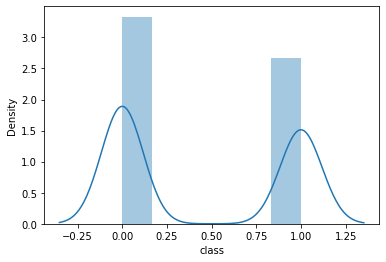

In [113]:
### distribution plot for class
sns.distplot(df_eda['class'])

Here the both class are normally distributed !

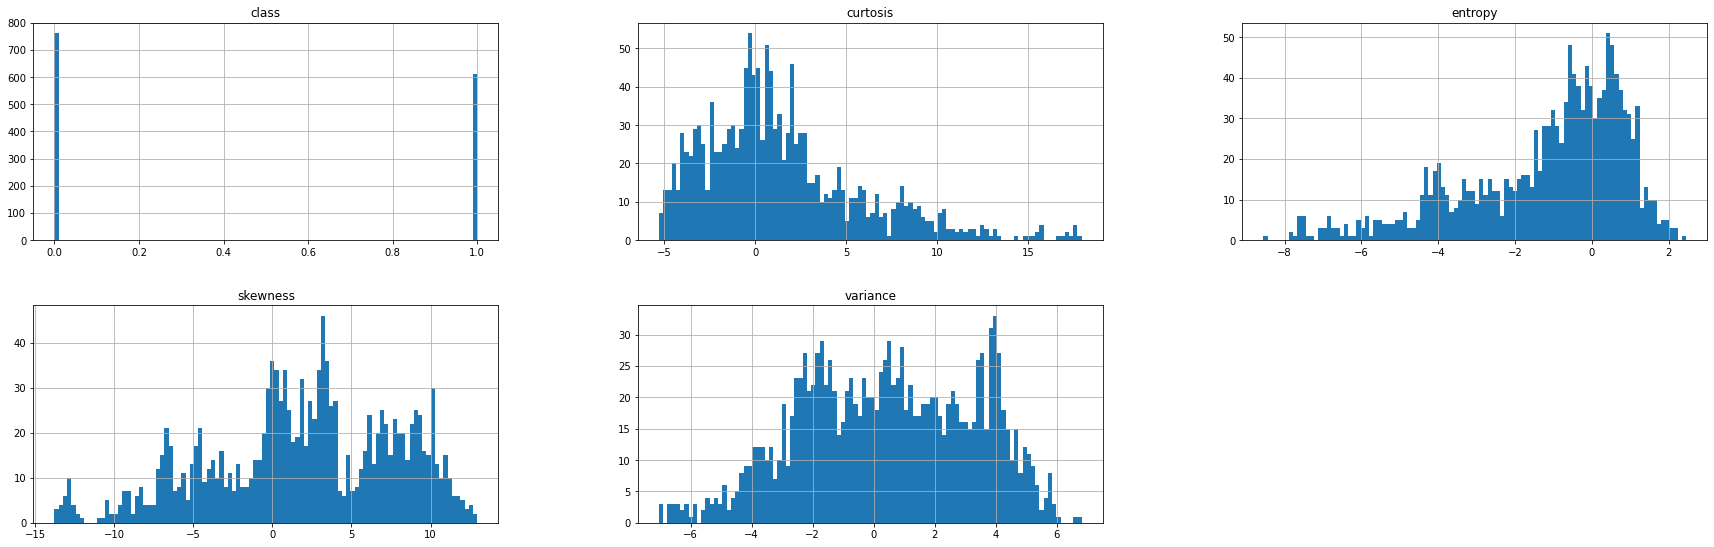

In [114]:
#### Multivariant Analysis
### each column histogram plot
df_eda.hist(bins = 100,layout = (6,3),figsize = (30,30));

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1080x1440 with 0 Axes>

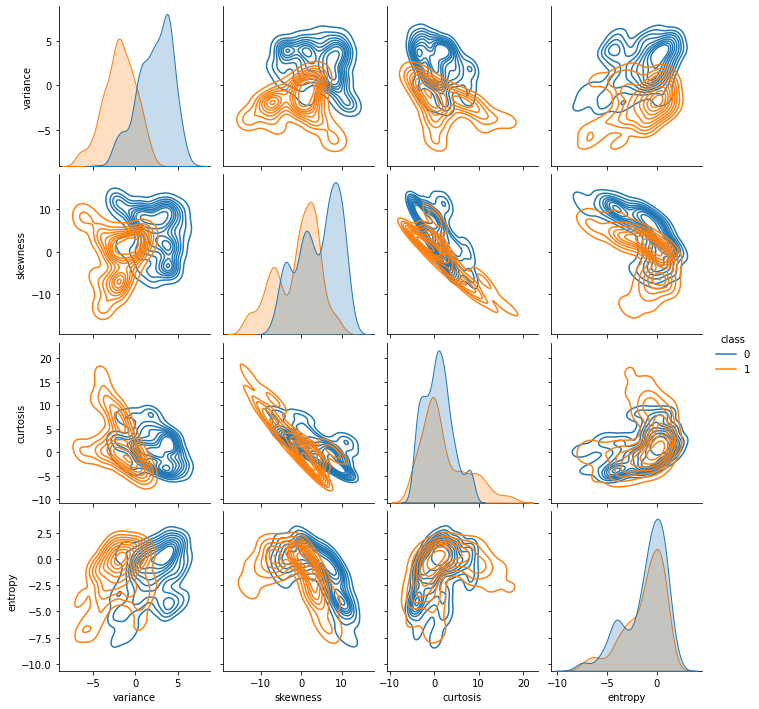

In [115]:
### pairplot
plt.figure(figsize = (15,20))
sns.pairplot(df_eda,kind = 'kde',hue = 'class')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

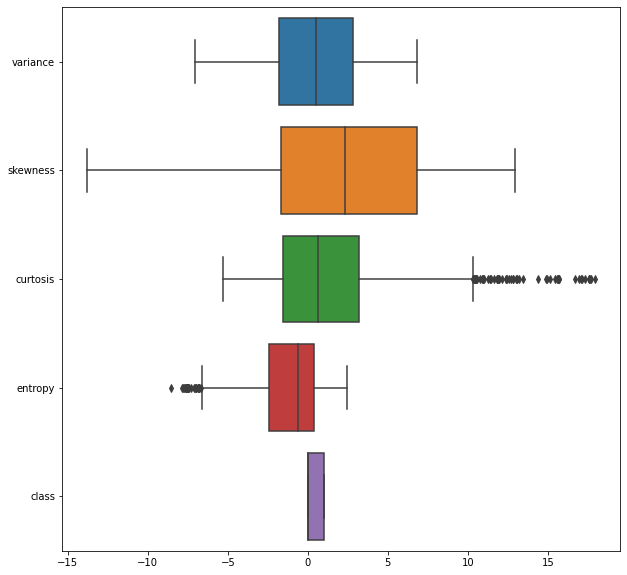

In [116]:
#### boxplot
plt.figure(figsize = (10,10))
sns.boxplot(data = df_eda ,orient = 'h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

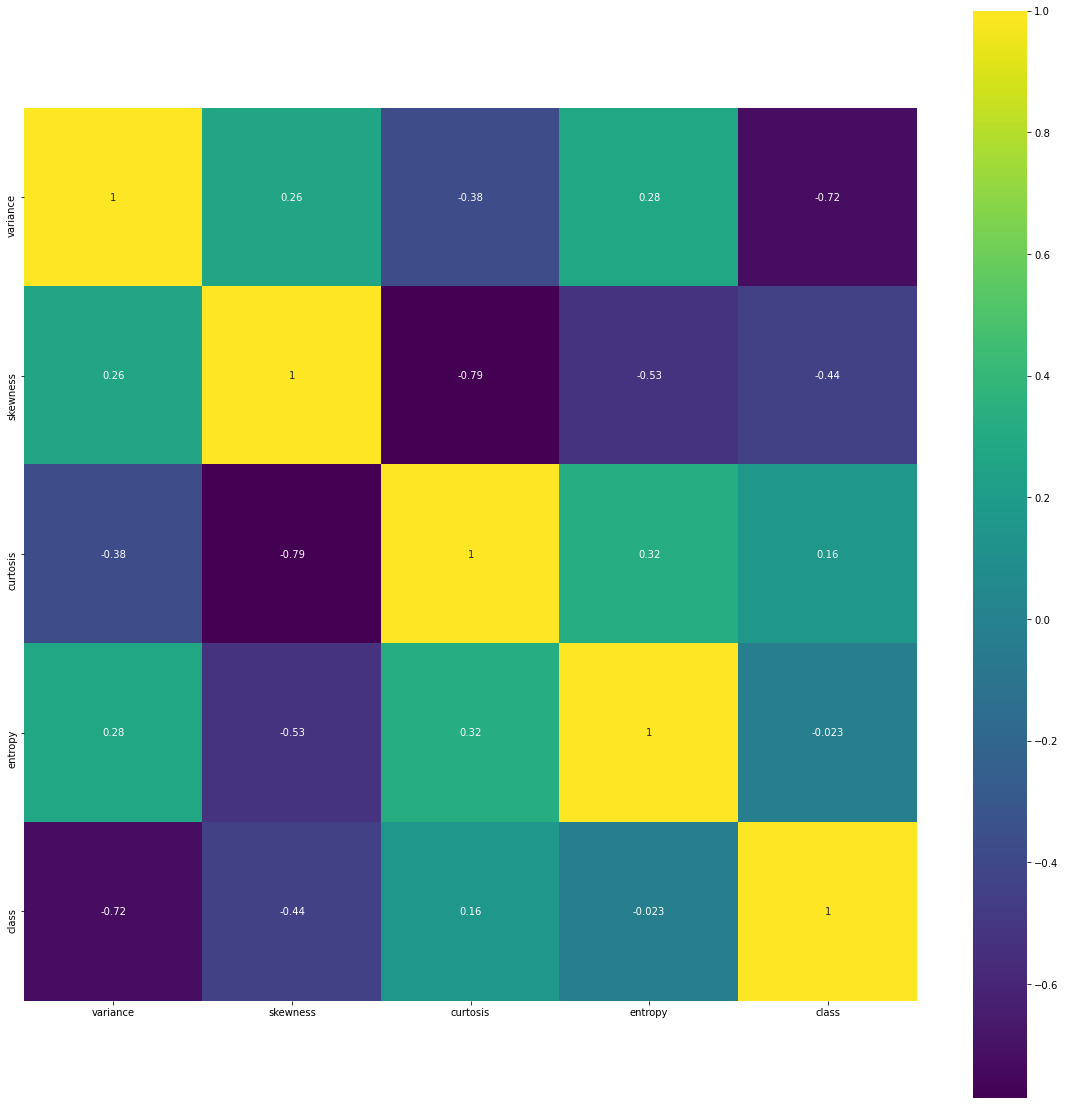

In [117]:
#### correlation
plt.figure(figsize = (20,20))
sns.heatmap(df_eda.corr(),vmax = 1,annot = True,square =True,cmap = 'viridis')

#### test train split

In [118]:
df_train_test = df_eda.copy()
X = df_train_test.drop(['class'],axis = 1)
y = df_train_test['class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

<IPython.core.display.Javascript object>

#### scaling

Here the data with respect to each attributes are quite spread out , Hence to make our model work out properly, we need
to scale our data.

In [119]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Model Creation

#### Logistic Regression

In [120]:
logit = LogisticRegression(solver = 'liblinear').fit(X_train,y_train)

<IPython.core.display.Javascript object>

In [121]:
#### performance matrix from Logit

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

# accuracy: (tp + tn) / (p + n)
print("Training accuracy for Logit is : " , accuracy_score(y_train,logit.predict(X_train)))
print("Training confusion matrix for logit is : " ,  confusion_matrix(y_train, logit.predict(X_train)))

# precision tp / (tp + fp)
precision_train = precision_score(y_train, logit.predict(X_train),average=None)
print('Precision train: ' , precision_train)

# recall: tp / (tp + fn)
recall_train = recall_score(y_train, logit.predict(X_train),average=None)
print('Recall train: ' , recall_train)

# f1: 2 tp / (2 tp + fp + fn)
f1_train = f1_score(y_train, logit.predict(X_train),average=None)
print('F1 score train: ' , f1_train)

# accuracy: (tp + tn) / (p + n)
print("Test accuracy for Logit is : " , accuracy_score(y_test, logit.predict(X_test)))
print("Test confusion matrix for Logit is : " ,  confusion_matrix(y_test, logit.predict(X_test)))

# precision tp / (tp + fp)
precision_test = precision_score(y_test, logit.predict(X_test),average=None)
print('Precision test: ', precision_test)

# recall: tp / (tp + fn)
recall_test = recall_score(y_test, logit.predict(X_test),average=None)
print('Recall test: ' , recall_test)

# f1: 2 tp / (2 tp + fp + fn)
f1_test = f1_score(y_test, logit.predict(X_test),average=None)
print('F1 score test: ' , f1_test)

Training accuracy for Logit is :  0.9833333333333333
Training confusion matrix for logit is :  [[511  16]
 [  0 433]]
Precision train:  [1.         0.96436526]
Recall train:  [0.96963947 1.        ]
F1 score train:  [0.98458574 0.98185941]
Test accuracy for Logit is :  0.9757281553398058
Test confusion matrix for Logit is :  [[227   8]
 [  2 175]]
Precision test:  [0.99126638 0.95628415]
Recall test:  [0.96595745 0.98870056]
F1 score test:  [0.97844828 0.97222222]


In [122]:
####  trying out cross validation score mean
accuracies = cross_val_score(estimator = logit,X = X_train,y = y_train,cv = 10)
print("accuracy : ",accuracies.mean())

<IPython.core.display.Javascript object>

accuracy :  0.9822688325194431


#### Support Vector Machine

In [123]:
svmachine = svm.SVC(kernel = 'linear',C = 1).fit(X_train,y_train)

<IPython.core.display.Javascript object>

In [124]:
#### performance matrix from SVM

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

# accuracy: (tp + tn) / (p + n)
print("Training accuracy for SVM is : " , accuracy_score(y_train,svmachine.predict(X_train)))
print("Training confusion matrix for SVM is : " ,  confusion_matrix(y_train, svmachine.predict(X_train)))

# precision tp / (tp + fp)
precision_train = precision_score(y_train, svmachine.predict(X_train),average=None)
print('Precision train: ' , precision_train)

# recall: tp / (tp + fn)
recall_train = recall_score(y_train, svmachine.predict(X_train),average=None)
print('Recall train: ' , recall_train)

# f1: 2 tp / (2 tp + fp + fn)
f1_train = f1_score(y_train, svmachine.predict(X_train),average=None)
print('F1 score train: ' , f1_train)

# accuracy: (tp + tn) / (p + n)
print("Test accuracy for SVM is : " , accuracy_score(y_test, svmachine.predict(X_test)))
print("Test confusion matrix for SVM is : " ,  confusion_matrix(y_test, svmachine.predict(X_test)))

# precision tp / (tp + fp)
precision_test = precision_score(y_test, svmachine.predict(X_test),average=None)
print('Precision test: ', precision_test)

# recall: tp / (tp + fn)
recall_test = recall_score(y_test, svmachine.predict(X_test),average=None)
print('Recall test: ' , recall_test)

# f1: 2 tp / (2 tp + fp + fn)
f1_test = f1_score(y_test, svmachine.predict(X_test),average=None)
print('F1 score test: ' , f1_test)

Training accuracy for SVM is :  0.9885416666666667
Training confusion matrix for SVM is :  [[516  11]
 [  0 433]]
Precision train:  [1.         0.97522523]
Recall train:  [0.97912713 1.        ]
F1 score train:  [0.9894535  0.98745724]
Test accuracy for SVM is :  0.9830097087378641
Test confusion matrix for SVM is :  [[230   5]
 [  2 175]]
Precision test:  [0.99137931 0.97222222]
Recall test:  [0.9787234  0.98870056]
F1 score test:  [0.98501071 0.98039216]


In [125]:
####  trying out cross validation score mean
accuracies = cross_val_score(estimator = svmachine,X = X_train,y = y_train,cv = 10)
print("accuracy : ",accuracies.mean())

<IPython.core.display.Javascript object>

accuracy :  0.9843523919334419


#### K-Nearest Neighbor Classifier

In [126]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1).fit(X_train,y_train)

In [127]:
#### performance matrix from KNN

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

# accuracy: (tp + tn) / (p + n)
print("Training accuracy for KNN is : " , accuracy_score(y_train,knn.predict(X_train)))
print("Training confusion matrix for KNN is : " ,  confusion_matrix(y_train, knn.predict(X_train)))

# precision tp / (tp + fp)
precision_train = precision_score(y_train, knn.predict(X_train),average=None)
print('Precision train: ' , precision_train)

# recall: tp / (tp + fn)
recall_train = recall_score(y_train, knn.predict(X_train),average=None)
print('Recall train: ' , recall_train)

# f1: 2 tp / (2 tp + fp + fn)
f1_train = f1_score(y_train, knn.predict(X_train),average=None)
print('F1 score train: ' , f1_train)

# accuracy: (tp + tn) / (p + n)
print("Test accuracy for KNN is : " , accuracy_score(y_test, knn.predict(X_test)))
print("Test confusion matrix for KNN is : " ,  confusion_matrix(y_test, knn.predict(X_test)))

# precision tp / (tp + fp)
precision_test = precision_score(y_test, knn.predict(X_test),average=None)
print('Precision test: ', precision_test)

# recall: tp / (tp + fn)
recall_test = recall_score(y_test, knn.predict(X_test),average=None)
print('Recall test: ' , recall_test)

# f1: 2 tp / (2 tp + fp + fn)
f1_test = f1_score(y_test, knn.predict(X_test),average=None)
print('F1 score test: ' , f1_test)

Training accuracy for KNN is :  1.0
Training confusion matrix for KNN is :  [[527   0]
 [  0 433]]
Precision train:  [1. 1.]
Recall train:  [1. 1.]
F1 score train:  [1. 1.]
Test accuracy for KNN is :  0.9975728155339806
Test confusion matrix for KNN is :  [[234   1]
 [  0 177]]
Precision test:  [1.         0.99438202]
Recall test:  [0.99574468 1.        ]
F1 score test:  [0.9978678 0.9971831]


In [128]:
####  trying out cross validation score mean
accuracies = cross_val_score(estimator = knn,X = X_train,y = y_train,cv = 10)
print("accuracy : ",accuracies.mean())

<IPython.core.display.Javascript object>

accuracy :  0.9989690721649485


#### Random Forest Classifier

In [132]:
rfc = RandomForestClassifier(n_estimators = 100,n_jobs = -1,criterion = 'entropy').fit(X_train,y_train)

<IPython.core.display.Javascript object>

In [133]:
#### performance matrix from Random Forest Classifer

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

# accuracy: (tp + tn) / (p + n)
print("Training accuracy for Random Forest Classifer is : " , accuracy_score(y_train,rfc.predict(X_train)))
print("Training confusion matrix for Random Forest Classifer is : " ,  confusion_matrix(y_train, rfc.predict(X_train)))

# precision tp / (tp + fp)
precision_train = precision_score(y_train, rfc.predict(X_train),average=None)
print('Precision train: ' , precision_train)

# recall: tp / (tp + fn)
recall_train = recall_score(y_train, rfc.predict(X_train),average=None)
print('Recall train: ' , recall_train)

# f1: 2 tp / (2 tp + fp + fn)
f1_train = f1_score(y_train, rfc.predict(X_train),average=None)
print('F1 score train: ' , f1_train)

# accuracy: (tp + tn) / (p + n)
print("Test accuracy for Random Forest Classifier is : " , accuracy_score(y_test, rfc.predict(X_test)))
print("Test confusion matrix for Random Forest Classifier is : " ,  confusion_matrix(y_test, rfc.predict(X_test)))

# precision tp / (tp + fp)
precision_test = precision_score(y_test, rfc.predict(X_test),average=None)
print('Precision test: ', precision_test)

# recall: tp / (tp + fn)
recall_test = recall_score(y_test, rfc.predict(X_test),average=None)
print('Recall test: ' , recall_test)

# f1: 2 tp / (2 tp + fp + fn)
f1_test = f1_score(y_test, rfc.predict(X_test),average=None)
print('F1 score test: ' , f1_test)

Training accuracy for Random Forest Classifer is :  1.0
Training confusion matrix for Random Forest Classifer is :  [[527   0]
 [  0 433]]
Precision train:  [1. 1.]
Recall train:  [1. 1.]
F1 score train:  [1. 1.]
Test accuracy for Random Forest Classifier is :  0.9902912621359223
Test confusion matrix for Random Forest Classifier is :  [[231   4]
 [  0 177]]
Precision test:  [1.         0.97790055]
Recall test:  [0.98297872 1.        ]
F1 score test:  [0.99141631 0.98882682]


In [134]:
####  trying out cross validation score mean
accuracies = cross_val_score(estimator = rfc,X = X_train,y = y_train,cv = 10)
print("accuracy : ",accuracies.mean())

<IPython.core.display.Javascript object>

accuracy :  0.9937929553264606


### dumping models for future use

In [136]:
import joblib

joblib.dump(svm,'models/SVM.pkl')
joblib.dump(knn,'models/KNN.pkl')
joblib.dump(rfc,'models/RandomForestClassifier.pkl')
joblib.dump(logit,'models/LogisticRegression.pkl')

<IPython.core.display.Javascript object>

['models/LogisticRegression.pkl']